In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import os

In [3]:
train_df = pd.read_csv('data/cars_data.csv')
train_df.sample(10)
train_df.shape

(6019, 14)

In [4]:
train_df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

Dropping New_Price and Unnamed column.

In [5]:
train_df.drop('Unnamed: 0', axis=1, inplace=True)
train_df.drop('New_Price', axis=1, inplace=True)
train_df.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4443,Chevrolet Spark 1.0 LS,Kolkata,2007,42100,Petrol,Manual,First,18.0 kmpl,995 CC,62 bhp,5.0,0.99
5324,Hyundai Grand i10 1.2 CRDi Sportz,Delhi,2015,59261,Diesel,Manual,First,24.0 kmpl,1186 CC,73.97 bhp,5.0,4.25
4108,Mitsubishi Pajero Sport 4X4 AT,Coimbatore,2019,11827,Diesel,Automatic,First,13.5 kmpl,2477 CC,175.56 bhp,6.0,27.11
2634,Hyundai Getz GLS ABS,Pune,2005,91000,Petrol,Manual,Third,16.8 kmpl,1341 CC,83 bhp,5.0,0.80
2639,Hyundai Grand i10 Sportz,Jaipur,2015,14000,Petrol,Manual,First,18.9 kmpl,1197 CC,82 bhp,5.0,4.60
3384,Hyundai Verna 1.6 CRDI AT SX Option,Chennai,2016,27000,Diesel,Automatic,First,19.08 kmpl,1582 CC,126.2 bhp,5.0,8.60
5723,Mercedes-Benz B Class B180,Delhi,2013,30000,Petrol,Automatic,Second,14.8 kmpl,1595 CC,120.7 bhp,5.0,11.00
3002,Maruti Swift VXI,Pune,2010,68000,Petrol,Manual,First,22.0 kmpl,1197 CC,81.80 bhp,5.0,2.80
1425,Renault Duster 110PS Diesel RxL,Bangalore,2014,70000,Diesel,Manual,First,19.01 kmpl,1461 CC,108.45 bhp,5.0,8.25
1614,Hyundai i20 1.4 CRDi Asta,Hyderabad,2012,60788,Diesel,Manual,First,23.0 kmpl,1396 CC,90 bhp,5.0,4.50


In [6]:
train_df[train_df['Mileage'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


Electric car Mileage is stored as Nan. To resolve this we can replace it with cost per km. But for now we can drop it.

In [7]:
train_df[train_df['Engine'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,1.93


We can see there is a huge overlap among data where power and engine both are missing. So i can drop these rows without losing much data.

In [8]:
train_df = train_df[train_df['Engine'].notna()]
train_df = train_df[train_df['Power'].notna()]
train_df = train_df[train_df['Seats'].notna()]
train_df = train_df[train_df['Mileage'].notna()]
train_df.shape

(5975, 12)

In [9]:
train_df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [10]:
train_df = train_df.reset_index(drop=True)
train_df.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5608,Skoda Rapid Ultima 1.6 MPI Ambition Plus,Bangalore,2013,66700,Petrol,Manual,First,15.0 kmpl,1598 CC,103.5 bhp,5.0,4.00
1064,Maruti Swift Dzire VDI,Kolkata,2014,45000,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,3.85
1849,Chevrolet Spark 1.0 LS,Pune,2009,44200,Petrol,Manual,Second,18.0 kmpl,995 CC,62 bhp,5.0,1.60
4156,Maruti Ertiga VDI,Chennai,2016,86000,Diesel,Manual,Second,25.47 kmpl,1248 CC,88.50 bhp,7.0,8.20
2290,Honda City ZX VTEC,Chennai,2006,109000,Petrol,Manual,First,16.9 kmpl,1497 CC,100 bhp,5.0,1.50


reseting the index

Power,engine andhave CC and bhp terms which needs to be reomoved when converting to int.

In [11]:
train_df['Power'] = train_df['Power'].str.replace('bhp', "")
train_df['Mileage'] = train_df['Mileage'].str.replace('kmpl', "")
train_df['Mileage'] = train_df['Mileage'].str.replace('km/kg', "")
train_df['Engine'] = train_df['Engine'].str.replace('CC',"")

train_df.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3357,Maruti Vitara Brezza LDi,Kochi,2017,35384,Diesel,Manual,First,24.3,1248,88.5,5.0,8.61
1767,Hyundai Verna 1.6 SX VTVT (O),Pune,2013,21107,Petrol,Manual,First,17.1,1591,121.3,5.0,5.25
2284,Ford EcoSport 1.5 Ti VCT MT Titanium BE,Mumbai,2016,7000,Petrol,Manual,First,18.88,1499,110.4,5.0,6.90
824,Toyota Etios Liva G,Mumbai,2012,29605,Petrol,Manual,First,18.3,1197,null,5.0,2.44
4486,Volkswagen Vento 1.5 TDI Highline,Coimbatore,2016,62767,Diesel,Manual,First,20.34,1498,103.2,5.0,9.75
5776,Renault KWID RXT Optional,Kochi,2017,21954,Petrol,Manual,First,25.17,799,53.3,5.0,3.70
1701,Maruti Baleno Delta Automatic,Delhi,2017,44000,Petrol,Automatic,First,21.4,1197,83.1,5.0,6.20
4367,Volkswagen Polo Petrol Highline 1.6L,Kolkata,2011,46000,Petrol,Manual,First,15.26,1598,103.5,5.0,2.35
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
2709,Honda CR-V 2.4L 4WD MT,Mumbai,2008,75000,Petrol,Manual,Second,11.1,2354,158.8,5.0,3.90


In [12]:
train_df.dtypes
train_df.shape

(5975, 12)

In [13]:
train_df['Mileage'] = train_df['Mileage'].astype(float)


In [14]:
train_df = train_df[train_df['Power'] != 'null ']
 # some power values were null with a space at the end cauing isnull fucntion to fail. train_df = train_df[~pd.isnull(train_df['Power'])]

train_df['Power'] = train_df['Power'].astype(float)
train_df['Engine'] = train_df['Engine'].astype(float)

In [15]:
train_df.shape

(5872, 12)

In [16]:
train_df['Location'].unique()
train_df['Fuel_Type'].unique()
train_df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [36]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5870 entries, 0 to 5974
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5870 non-null   object 
 1   Location           5870 non-null   object 
 2   Year               5870 non-null   int64  
 3   Kilometers_Driven  5870 non-null   int64  
 4   Fuel_Type          5870 non-null   object 
 5   Transmission       5870 non-null   object 
 6   Owner_Type         5870 non-null   object 
 7   Mileage            5870 non-null   float64
 8   Engine             5870 non-null   float64
 9   Power              5870 non-null   float64
 10  Seats              5870 non-null   float64
 11  Price              5870 non-null   float64
 12  Brand              5870 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 642.0+ KB


# EDA

In [18]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


Skewness: 3.323089
Kurtosis: 16.962810


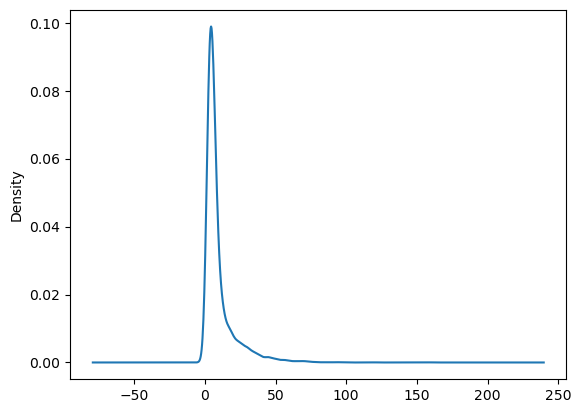

In [19]:
train_df['Price'].plot.kde()

print("Skewness: %f" % train_df['Price'].skew())
print("Kurtosis: %f" % train_df['Price'].kurt())

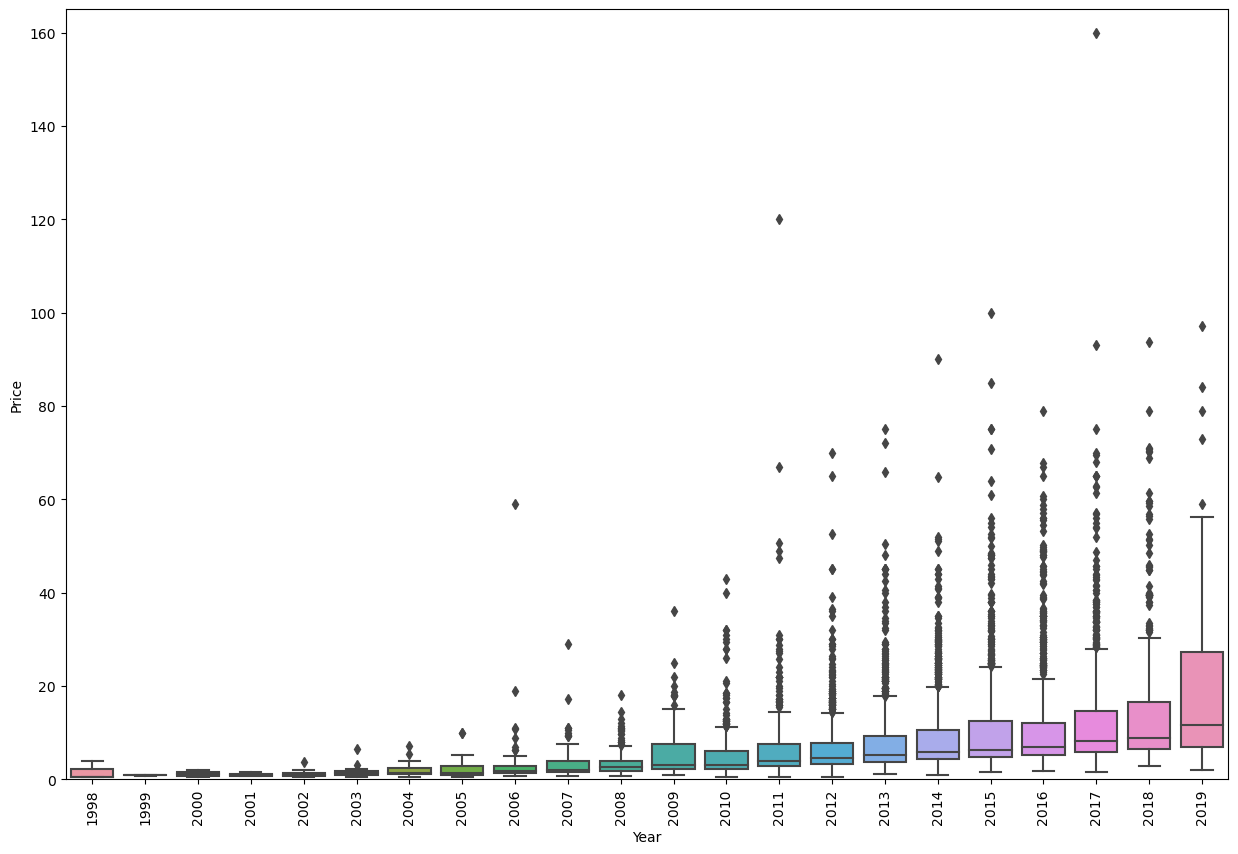

In [20]:
data = pd.concat([train_df['Price'], train_df["Year"]], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x="Year", y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


In [22]:
train_df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


In [24]:
# Extract the brand from the Name column
train_df['Brand'] = train_df['Name'].apply(lambda x: x.split()[0])

# Check the number of unique brands
num_brands = train_df['Brand'].nunique()
num_brands

30

In [25]:
# One-hot encode the categorical columns
df_encoded = pd.get_dummies(train_df, columns=['Brand', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'])

# Display the first few rows of the encoded dataframe
df_encoded.columns

Index(['Name', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price', 'Brand_Ambassador', 'Brand_Audi', 'Brand_BMW',
       'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat',
       'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_ISUZU', 'Brand_Isuzu', 'Brand_Jaguar', 'Brand_Jeep',
       'Brand_Lamborghini', 'Brand_Land', 'Brand_Mahindra', 'Brand_Maruti',
       'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan',
       'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Tata',
       'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transm

In [26]:
df_encoded.drop('Name', axis=1, inplace=True)


In [33]:
X = df_encoded.drop(columns='Price')
with open('column_names.pkl', 'wb') as f:
    pickle.dump(X.columns, f)
y = df_encoded['Price']

# Check the first few rows of the features
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [28]:
X.isnull().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Brand_Ambassador             0
Brand_Audi                   0
Brand_BMW                    0
Brand_Bentley                0
Brand_Chevrolet              0
Brand_Datsun                 0
Brand_Fiat                   0
Brand_Force                  0
Brand_Ford                   0
Brand_Honda                  0
Brand_Hyundai                0
Brand_ISUZU                  0
Brand_Isuzu                  0
Brand_Jaguar                 0
Brand_Jeep                   0
Brand_Lamborghini            0
Brand_Land                   0
Brand_Mahindra               0
Brand_Maruti                 0
Brand_Mercedes-Benz          0
Brand_Mini                   0
Brand_Mitsubishi             0
Brand_Nissan                 0
Brand_Porsche                0
Brand_Renault                0
Brand_Skoda                  0
Brand_Ta

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target for the test set
y_pred = model.predict(X_test)

# Compute metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

rmse, r2


(5.2302637435919905, 0.7392488571967193)

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn import metrics


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['XGBRegressor', XGBRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['ExtraTreesRegressor',ExtraTreesRegressor()]]

for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print('model:', name, 'Root Mean Squared  Error:' ,RMSE,'r2 score', r2, '\n')

Xgbr=XGBRegressor()
Xgbr.fit(X_train,y_train)

model: DecisionTreeRegressor Root Mean Squared  Error: 4.715230654767545 r2 score 0.8102797123414963 

model: XGBRegressor Root Mean Squared  Error: 2.8746634985956914 r2 score 0.9294849335421259 

model: RandomForestRegressor Root Mean Squared  Error: 3.2531443304732592 r2 score 0.909694426676711 

model: AdaBoostRegressor Root Mean Squared  Error: 10.173667113342272 r2 score 0.11679211629832398 

model: ExtraTreesRegressor Root Mean Squared  Error: 3.190910675146491 r2 score 0.9131165246545921 



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [32]:
import pickle
pickle.dump(Xgbr,open('XGB.pkl','wb'))